Visibility Amplitude: 0.9999207246221588
Visibility Phase (radians): 1.6159796145820442e-05


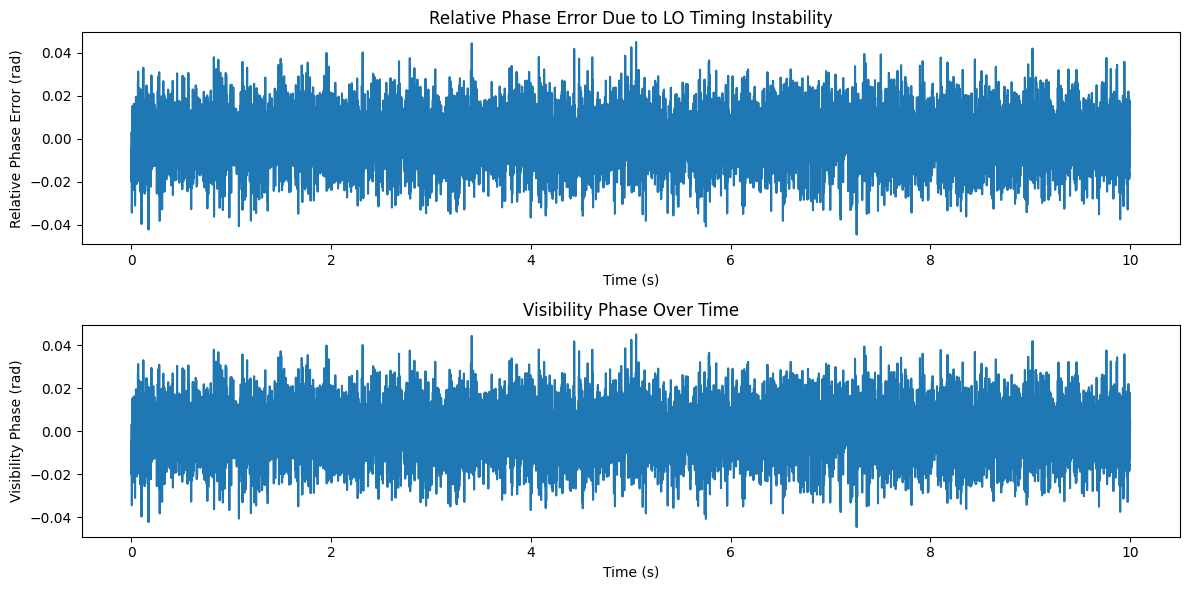

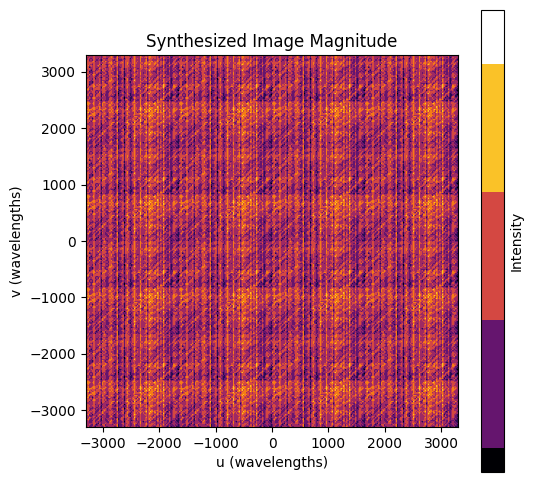

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e8  # Speed of light (m/s)

# Observation parameters
f = 1.4e9  # Observing frequency (Hz)
lambda_ = c / f  # Wavelength (m)

# Antenna parameters
Db = 1000  # Baseline length (meters)
B = 45  # Baseline orientation (degrees from true north)
La = 30  # Latitude of the antennas (degrees)

# Timing instability parameters
sigma_delta_t = 1e-12  # Standard deviation of LO timing error (seconds)

# Simulation parameters
t_total = 10  # Total observation time (seconds)
dt = 0.001  # Time step (seconds)
t = np.arange(0, t_total, dt)  # Time vector

# Generate random timing errors for each antenna
delta_t1 = sigma_delta_t * np.random.randn(len(t))  # Antenna 1 timing error
delta_t2 = sigma_delta_t * np.random.randn(len(t))  # Antenna 2 timing error

# Calculate phase errors induced by timing errors
phi1 = 2 * np.pi * f * delta_t1  # Antenna 1 phase error
phi2 = 2 * np.pi * f * delta_t2  # Antenna 2 phase error
delta_phi = phi1 - phi2  # Relative phase error

# Geometric delay (assuming source at zenith)
tau_g = 0  # Zero for zenith source

# Simulate received signals at each antenna
s1 = np.exp(-1j * (2 * np.pi * f * (t - tau_g) - phi1))
s2 = np.exp(-1j * (2 * np.pi * f * t - phi2))

# Compute the complex visibility
V12 = s1 * np.conj(s2)

# Time-averaged visibility
V12_avg = np.mean(V12)

# Visibility amplitude and phase
amp_V12 = np.abs(V12_avg)
phase_V12 = np.angle(V12_avg)

# Display results
print(f'Visibility Amplitude: {amp_V12}')
print(f'Visibility Phase (radians): {phase_V12}')

# Plot relative phase errors
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, delta_phi)
plt.xlabel('Time (s)')
plt.ylabel('Relative Phase Error (rad)')
plt.title('Relative Phase Error Due to LO Timing Instability')

# Plot visibility phase over time
plt.subplot(2, 1, 2)
plt.plot(t, np.angle(V12))
plt.xlabel('Time (s)')
plt.ylabel('Visibility Phase (rad)')
plt.title('Visibility Phase Over Time')

plt.tight_layout()
plt.show()

# Define u-v coordinates (spatial frequency domain)
u = (Db / lambda_) * np.cos(np.deg2rad(B))
v = (Db / lambda_) * np.sin(np.deg2rad(B))

# For simplicity, we'll create a grid in u-v space
uv_points = np.array([[u, v]])

# Accumulate visibilities over time (assuming a single baseline)
V = V12  # Using the computed visibility over time

# Grid the visibilities (this is a simplified version)
grid_size = 256  # Size of the image grid
image_grid = np.zeros((grid_size, grid_size), dtype=complex)

# Determine the grid coordinates
u_max = np.max(np.abs(u))
v_max = np.max(np.abs(v))
du = (2 * u_max) / grid_size
dv = (2 * v_max) / grid_size

# Map uv coordinates to grid indices
u_indices = ((u + u_max) / du).astype(int)
v_indices = ((v + v_max) / dv).astype(int)

# Ensure indices are within grid bounds
u_indices = np.clip(u_indices, 0, grid_size - 1)
v_indices = np.clip(v_indices, 0, grid_size - 1)

# Populate the grid with visibilities
for idx in range(len(V)):
    ui = u_indices
    vi = v_indices
    image_grid[vi, ui] += V[idx]

# Perform inverse Fourier transform to form the image
image = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(image_grid)))

# Plot the synthesized image magnitude
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(image), extent=[-u_max, u_max, -v_max, v_max], cmap='inferno')
plt.xlabel('u (wavelengths)')
plt.ylabel('v (wavelengths)')
plt.title('Synthesized Image Magnitude')
plt.colorbar(label='Intensity')
plt.show()
